# Analysis Lyrics

En este cuaderno se realizará un pequeño análisis de las letras de las canciones. Para ello se han escogido dos géneros musicales a analizar, el *pop* y la música urbana, dos géneros que se encuentran dentro del *top* 10. El *pop* como número 1 y *urban music* en la posición 4, pero como se ha podido ver con un importante crecimiento en los últimos años.

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns

## Urban Music
- Comenzaremos haciendo un análisis de la música urbana

In [4]:
df_urban_lyrics = pd.read_csv('../Data/top_100_Billboard_urban_lyrics.csv')

Para asegurarnos que todas las canciones encontradas pertenecen a una canción, ya que en genius también se pueden encontrar artículos, vamos a quedarnos con aquellas letras que contienen estribillo, asegurando así que corresponde con canciones.

In [5]:
df_urban_clean = df_urban_lyrics[(df_urban_lyrics["song_lyrics"].notna()) &
                                (df_urban_lyrics["song_lyrics"].str.contains('Chorus'))]
df_urban_clean = df_urban_clean.reset_index(drop=True)

Para no complicar demasiado nuestro análisis y, ya que estamos realizando el estudio en Estados Unidos, la gran mayoría de los *hits* son en habla inglesa, vamos a quedarnos con las letras en este idioma.

In [6]:
df_urban_en = pd.DataFrame.copy(df_urban_clean)
for i, item in df_urban_en.iterrows():
    if detect(item['song_lyrics']) != 'en':
        df_urban_en = df_urban_en.drop(df_urban_en.index[i])

Vamos a tratar de descubrir cuáles son las palabras más utilizadas en los estribillos de las canciones.

In [7]:
chorus_str_urban = ''
number_urban_songs = 0
for i, item in df_urban_en.iterrows():
    try:
        chorus_str_urban += item["song_lyrics"].split('Chorus')[1].split("\n\n")[0].split(']')[1]
        number_urban_songs += 1
    except IndexError:
        pass

Tenemos un total de 3524 *hits* de música urbana con sus letras.

In [8]:
print(number_urban_songs)

3524


A continuación de todos los estribillos juntados en uno, buscaremos los sustantivos más comunes.

In [9]:
nlp = spacy.load('en_core_web_md')

In [10]:
chorus_all_urban = nlp (chorus_str_urban)

In [11]:
nouns_urban = [token.lemma_ for token in chorus_all_urban if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN']

Lista de los 10 sustantivos más frecuentados en el género urbano.

In [12]:
common_nouns_urban = Counter(nouns_urban)
print(common_nouns_urban.most_common(10))

[('baby', 952), ('love', 915), ('girl', 719), ('time', 546), ('way', 455), ('bitch', 447), ('nigga', 427), ('life', 382), ('money', 380), ('night', 352)]


Realizaremos la misma cuenta pero para los adjetivos más frecuentados.

In [18]:
adjs_urban = [ token.lemma_ for token in chorus_all_urban if token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ']

In [19]:
counts_adjs_urban = Counter(adjs_urban)
print(counts_adjs_urban.most_common(10))

[('good', 348), ('bad', 237), ('real', 208), ('big', 188), ('right', 153), ('new', 141), ('high', 139), ('crazy', 130), ('hot', 127), ('little', 123)]


### Evolución de palabras
- Vamos a representar la evolución algunos de los sustantivos más comunes para el género urbano en el tiempo.

En los siguientes gráficos se puede apreciar en verde, el número de canciones de pop que tenemos para ese año, en naranja el número de canciones que contienen al menos una vez el término más usado, y en azul el número total de veces que aparece esa palabra en todas las canciones de pop de ese año.

In [83]:
df_urban_en = df_urban_en.reset_index(drop=True)
df_urban_counts = pd.DataFrame.copy(df_urban_en)
df_urban_counts['baby_count'] = 0
for i, item in df_urban_counts.iterrows():
    df_urban_counts.loc[i,'baby_count'] = item['song_lyrics'].lower().count('baby')
df_urban_counts['songs_with_baby'] = 0 
df_urban_counts = df_urban_counts.assign(songs_with_baby = np.where(df_urban_counts['baby_count']>0, 1, 0))

In [86]:
baby_counts = df_urban_counts.groupby('year_chart').sum()['baby_count']
songs_with_baby = df_urban_counts.groupby('year_chart').sum()['songs_with_baby']
urban_counts = df_urban_counts.groupby('year_chart').count()['id']
data_baby = pd.DataFrame({
    'Year': baby_counts.index, 
    'baby_counts': baby_counts.values,
    'songs_with_baby': songs_with_baby.values,
    'pop_songs': urban_counts.values})

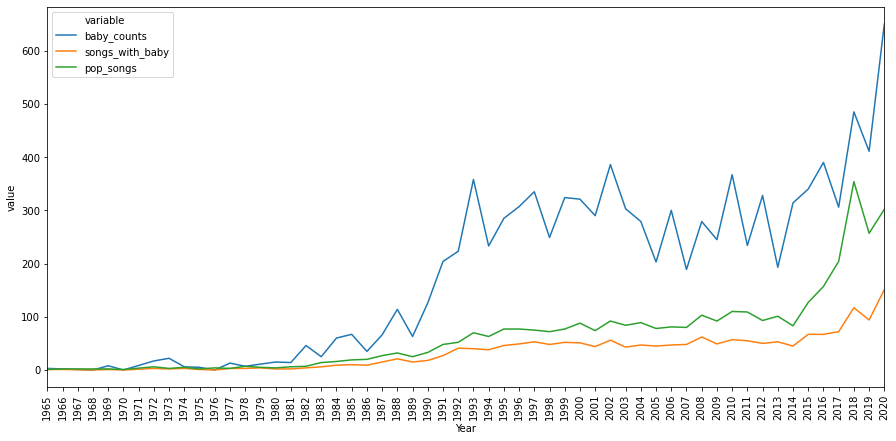

In [87]:
min_year_urban = df_urban_counts.iloc[:]["year_chart"].min()
max_year_urban  = df_urban_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_urban,max_year_urban)
ax.set_xticks(range(min_year_urban,max_year_urban+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_baby, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

Se puede observar como *baby* es muy utilizado en las canciones de urbanas.

In [91]:
df_urban_counts = df_urban_counts.reset_index(drop=True)
df_urban_counts['love_count'] = 0
for i, item in df_urban_counts.iterrows():
    df_urban_counts.loc[i,'love_count'] = item['song_lyrics'].lower().count('love')
df_urban_counts['songs_with_love'] = 0 
df_urban_counts = df_urban_counts.assign(songs_with_love = np.where(df_urban_counts['love_count']>0, 1, 0))

In [92]:
love_counts = df_urban_counts.groupby('year_chart').sum()['love_count']
songs_with_love = df_urban_counts.groupby('year_chart').sum()['songs_with_love']
urban_counts = df_urban_counts.groupby('year_chart').count()['id']
data_love = pd.DataFrame({
    'Year': love_counts.index, 
    'love_counts': love_counts.values,
    'songs_with_love': songs_with_love.values,
    'urban_songs': urban_counts.values})

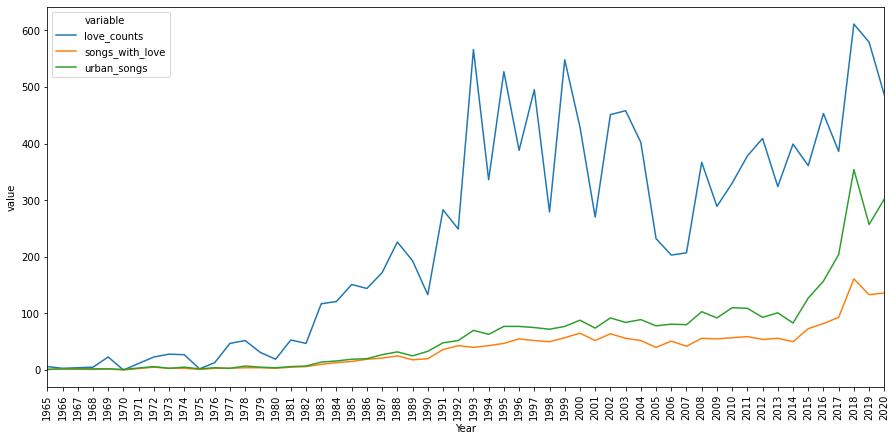

In [93]:
min_year_urban = df_urban_counts.iloc[:]["year_chart"].min()
max_year_urban  = df_urban_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_urban,max_year_urban)
ax.set_xticks(range(min_year_urban,max_year_urban+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_love, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

Podemos observar como en gran cantidad de canciones se usa la palabra love, y nos podemos hacer una idea de la cantidad de veces que se puede usar en las canciones con la línea azul.

In [95]:
df_urban_counts = df_urban_counts.reset_index(drop=True)
df_urban_counts['girl_count'] = 0
for i, item in df_urban_counts.iterrows():
    df_urban_counts.loc[i,'girl_count'] = item['song_lyrics'].lower().count('girl')
df_urban_counts['songs_with_girl'] = 0 
df_urban_counts = df_urban_counts.assign(songs_with_girl = np.where(df_urban_counts['girl_count']>0, 1, 0))

In [96]:
girl_counts = df_urban_counts.groupby('year_chart').sum()['love_count']
songs_with_girl = df_urban_counts.groupby('year_chart').sum()['songs_with_girl']
urban_counts = df_urban_counts.groupby('year_chart').count()['id']
data_girl = pd.DataFrame({
    'Year': girl_counts.index, 
    'girl_counts': girl_counts.values,
    'songs_with_girl': songs_with_girl.values,
    'urban_songs': urban_counts.values})

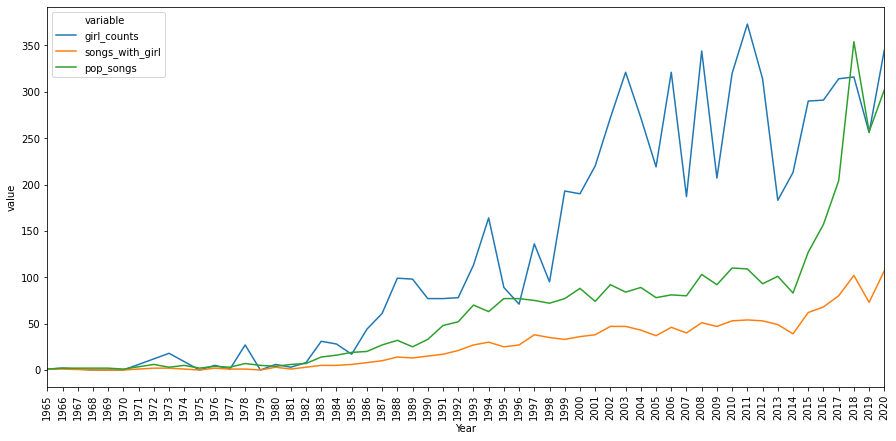

In [97]:
min_year_urban = df_urban_counts.iloc[:]["year_chart"].min()
max_year_urban  = df_urban_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_urban,max_year_urban)
ax.set_xticks(range(min_year_urban,max_year_urban+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_girl, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

Aquí se pueden observar mayores distanciamientos entre canciones que contienen y no contienen en este caso *girl*.

In [98]:
df_urban_counts = df_urban_counts.reset_index(drop=True)
df_urban_counts['nigga_count'] = 0
for i, item in df_urban_counts.iterrows():
    df_urban_counts.loc[i,'nigga_count'] = item['song_lyrics'].lower().count('nigga')
df_urban_counts['songs_with_nigga'] = 0 
df_urban_counts = df_urban_counts.assign(songs_with_nigga = np.where(df_urban_counts['nigga_count']>0, 1, 0))

In [100]:
nigga_counts = df_urban_counts.groupby('year_chart').sum()['nigga_count']
songs_with_nigga = df_urban_counts.groupby('year_chart').sum()['songs_with_nigga']
urban_counts = df_urban_counts.groupby('year_chart').count()['id']
data_nigga = pd.DataFrame({
    'Year': nigga_counts.index, 
    'nigga_counts': nigga_counts.values,
    'songs_with_nigga': songs_with_nigga.values,
    'urban_songs': urban_counts.values})

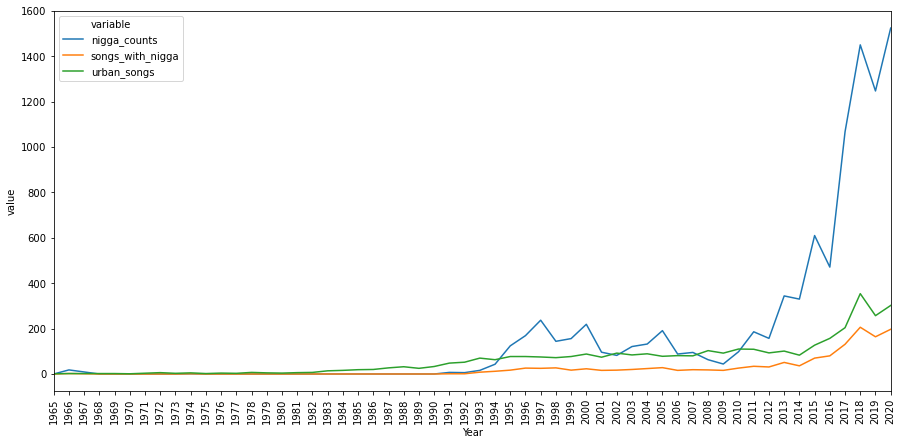

In [101]:
min_year_urban = df_urban_counts.iloc[:]["year_chart"].min()
max_year_urban  = df_urban_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_urban,max_year_urban)
ax.set_xticks(range(min_year_urban,max_year_urban+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_nigga, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

Me parecio interesante mostrar el uso del termino *nigga* en las canciones, podemos observar la cantidad de veces que se usa en las canciones a partir del 2018.

## Pop Music
- Haremos el mismo análisis para el género pop

In [20]:
df_pop_lyrics = pd.read_csv('../Data/top_100_Billboard_pop_lyrics.csv')

In [21]:
df_pop_clean = df_pop_lyrics[(df_pop_lyrics["song_lyrics"].notna()) &
                            (df_pop_lyrics["song_lyrics"].str.contains("Chorus"))]
df_pop_clean = df_pop_clean.reset_index(drop=True)

In [22]:
df_pop_en = pd.DataFrame.copy(df_pop_clean)
for i, item in df_urban_en.iterrows():
    if detect(item['song_lyrics']) != 'en':
        df_pop_en = df_pop_en.drop(df_pop_en.index[i])

In [23]:
chorus_pop = []
for i, item in df_pop_en.iterrows():
    try:
        chorus_pop += [item["song_lyrics"].split('Chorus')[1].split("\n\n")[0].split(']')[1]]
    except IndexError:
        pass

In [23]:
chorus_str_pop = ''
number_pop_songs = 0
for i, item in df_pop_en.iterrows():
    try:
        chorus_str_pop += item["song_lyrics"].split('Chorus')[1].split("\n\n")[0].split(']')[1]
        number_pop_songs += 1
    except IndexError:
        pass

In [24]:
print(number_pop_songs)

5638


Hemos tenido que separar en 2, el texto con la acumulación de todos los estribillos, ya que Spacy no puede procesar todo el texto de una.

In [25]:
chorus_1, chorus_2 = chorus_str_pop[:int(len(chorus_str_pop)/2)], chorus_str_pop[int(len(chorus_str_pop)/2):]

In [26]:
chorus_all_pop_1 = nlp (chorus_1)
chorus_all_pop_2 = nlp (chorus_2)

In [27]:
nouns_pop_1 = [ token.lemma_ for token in chorus_all_pop_1 if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN']
nouns_pop_2 = [ token.lemma_ for token in chorus_all_pop_2 if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN']

In [28]:
counts_noums_pop_1 = Counter(nouns_pop_1)
counts_noums_pop_2 = Counter(nouns_pop_2)
counts_noums_pop = counts_noums_pop_1 + counts_noums_pop_2
print (counts_noums_pop.most_common(10))

[('love', 1306), ('baby', 1282), ('girl', 827), ('time', 811), ('way', 639), ('night', 562), ('life', 471), ('heart', 439), ('day', 437), ('thing', 430)]


### Evolución de palabras
- Vamos a representar la evolución de algunos de los sustantivos más comunes para el género pop en el tiempo.

In [79]:
df_pop_en = df_pop_en.reset_index(drop=True)
df_pop_counts = pd.DataFrame.copy(df_pop_en)
df_pop_counts['love_count'] = 0
for i, item in df_pop_counts.iterrows():
    df_pop_counts.loc[i,'love_count'] = item['song_lyrics'].lower().count('love')
df_pop_counts['songs_with_love'] = 0 
df_pop_counts = df_pop_counts.assign(songs_with_love = np.where(df_pop_counts['love_count']>0, 1, 0))

In [80]:
love_counts = df_pop_counts.groupby('year_chart').sum()['love_count']
songs_with_love = df_pop_counts.groupby('year_chart').sum()['songs_with_love']
pop_counts = df_pop_counts.groupby('year_chart').count()['id']
data_love = pd.DataFrame({
    'Year': love_counts.index, 
    'love_counts': love_counts.values,
    'songs_with_love': songs_with_love.values,
    'pop_songs': pop_counts.values})

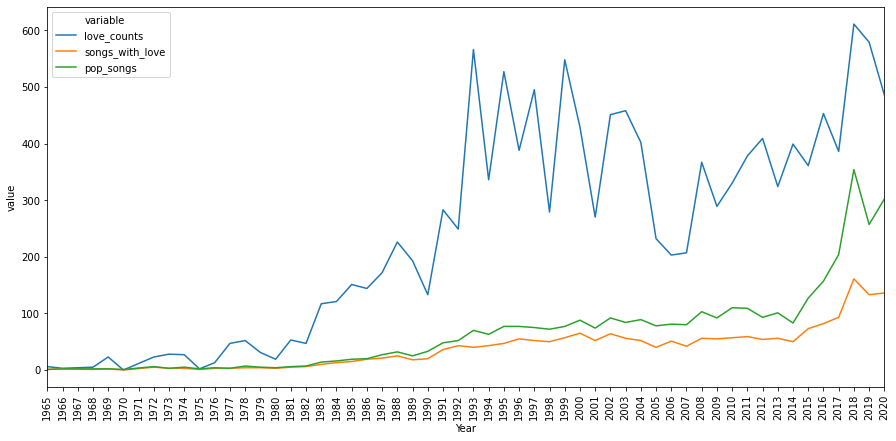

In [81]:
min_year_pop = df_pop_counts.iloc[:]["year_chart"].min()
max_year_pop  = df_pop_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_pop,max_year_pop)
ax.set_xticks(range(min_year_pop,max_year_pop+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_love, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

Podemos ver la cantidad de veces que es usada la palabra *love* en las canciones, junto con *baby*, son los dos sustantivos más utilizados tanto en la música urbana como en el pop.

In [70]:
df_pop_counts = df_pop_counts.reset_index(drop=True)
df_pop_counts['baby_count'] = 0
for i, item in df_pop_counts.iterrows():
    df_pop_counts.loc[i,'baby_count'] = item['song_lyrics'].lower().count('baby')
df_pop_counts['songs_with_baby'] = 0 
df_pop_counts = df_pop_counts.assign(songs_with_baby = np.where(df_pop_counts['baby_count']>0, 1, 0))

In [71]:
baby_counts = df_pop_counts.groupby('year_chart').sum()['baby_count']
songs_with_baby = df_pop_counts.groupby('year_chart').sum()['songs_with_baby']
pop_counts = df_pop_counts.groupby('year_chart').count()['id']
data_baby = pd.DataFrame({
    'Year': baby_counts.index, 
    'baby_counts': baby_counts.values,
    'songs_with_baby': songs_with_baby.values,
    'pop_songs': pop_counts.values})

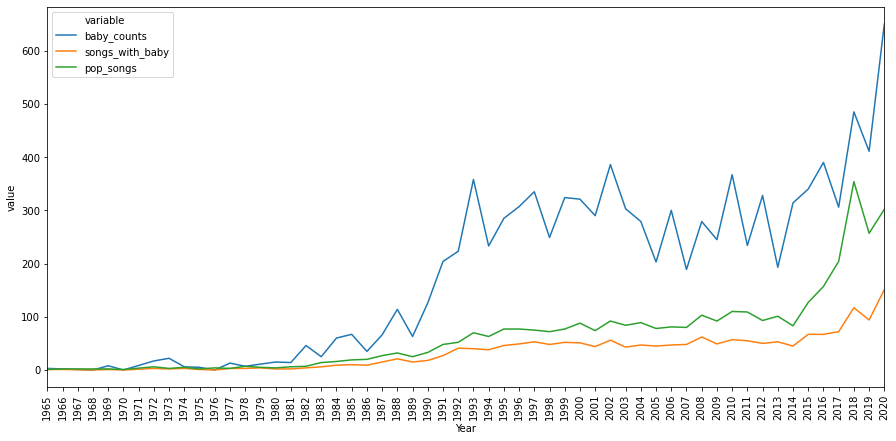

In [72]:
min_year_pop = df_pop_counts.iloc[:]["year_chart"].min()
max_year_pop  = df_pop_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_pop,max_year_pop)
ax.set_xticks(range(min_year_pop,max_year_pop+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_baby, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);

In [73]:
df_pop_counts = df_pop_counts.reset_index(drop=True)
df_pop_counts['girl_count'] = 0
for i, item in df_pop_counts.iterrows():
    df_pop_counts.loc[i,'girl_count'] = item['song_lyrics'].lower().count('girl')
df_pop_counts['songs_with_girl'] = 0 
df_pop_counts = df_pop_counts.assign(songs_with_girl = np.where(df_pop_counts['girl_count']>0, 1, 0))

In [74]:
girl_counts = df_pop_counts.groupby('year_chart').sum()['girl_count']
songs_with_girl = df_pop_counts.groupby('year_chart').sum()['songs_with_girl']
pop_counts = df_pop_counts.groupby('year_chart').count()['id']
data_girl = pd.DataFrame({
    'Year': girl_counts.index, 
    'girl_counts': girl_counts.values,
    'songs_with_girl': songs_with_girl.values,
    'pop_songs': pop_counts.values})

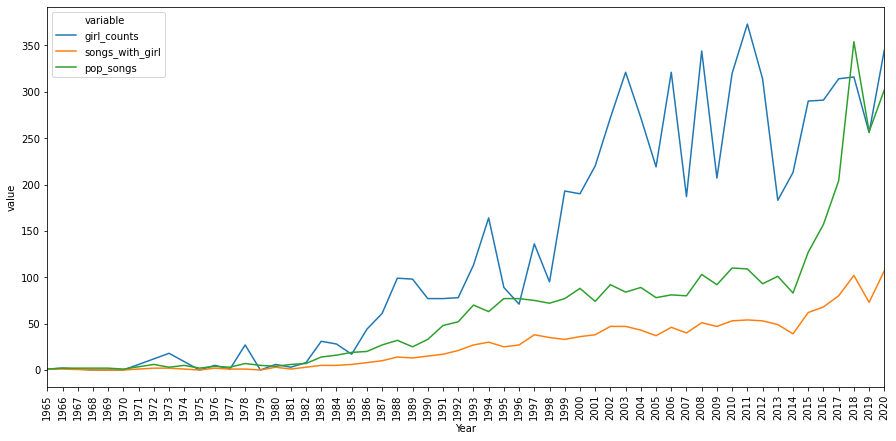

In [75]:
min_year_pop = df_pop_counts.iloc[:]["year_chart"].min()
max_year_pop  = df_pop_counts.iloc[:]["year_chart"].max()
dims = (15, 7)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_pop,max_year_pop)
ax.set_xticks(range(min_year_pop,max_year_pop+1))
chart = sns.lineplot(x='Year', y='value', hue='variable', 
                     data=pd.melt(data_girl, ['Year']))
plt.setp(chart.get_xticklabels(),rotation=90);